# Unsupervised Learning

Here there are unknown number of classes. No prior knowledge is required. It is used to understand the data.
It can also be used for anomaly detection.

## K-Means Clustering
* step 1: choose the number of clusters

* step 2: select at random k-points, the centroids(not necessarily from your dataset)

* step 3: assign each data point to the closest centroid

* step 4: compute and place the new centroid to each cluster.

* step 5: reassign each data point to the closest centroid. this process is continued.


### Random Initialization Trap

If we choose the number of clusters initially, as the centroids are changed continously, we might not get the correct cluster at the end(number of clusters may be correct the data points may not be clustered accurately).

The solution for this is kmeans++.

**WCSS(with cluster sum of squares):** Each time when we change the number of clusters we get a score. if we plot the WCSS value on y axis and clusters on the x-axis. Find the elbow and choose the x-axis value corresponding to the elbow. This value is taken as number of clusters. It is a method used to find the optimum number of clusters.

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
mall_data = pd.read_csv("datasets/Mall_Customers.csv")
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
mall_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
X = mall_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



In [22]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.57922077922,
 26686.837785187785,
 24766.471609793443,
 23103.122085983916]

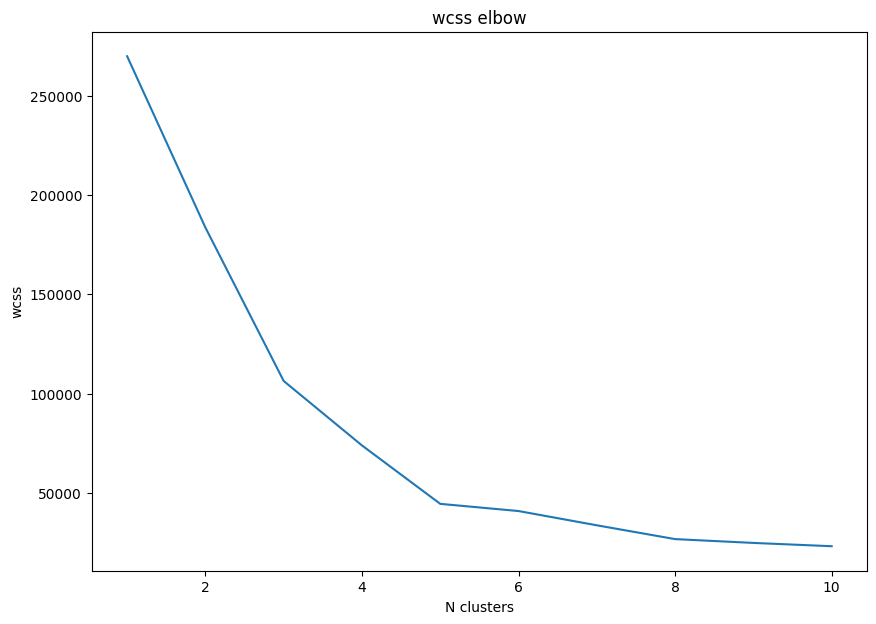

In [23]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.xlabel("N clusters")
plt.ylabel("wcss")
plt.title("wcss elbow")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit(X).predict(X)

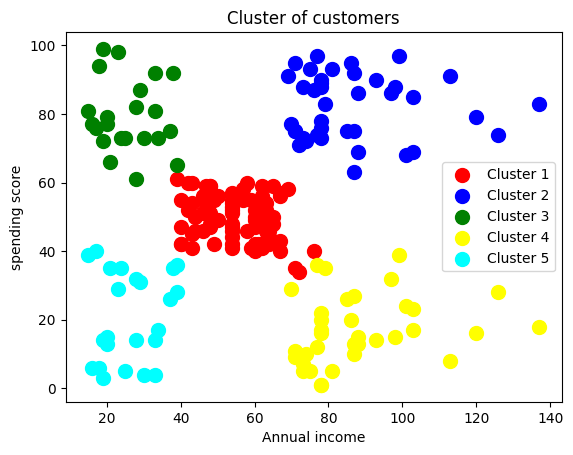

In [25]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='yellow',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='cyan',label='Cluster 5')
plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.legend()


In [26]:
# we use silhouette score to evaluate the model
from sklearn.metrics import silhouette_score
silhouette_score_avg = silhouette_score(X,y_kmeans)
silhouette_score_avg

0.553931997444648

if silhouette_score is above 0.5 it means that it is a good model(closer to 1 the better). It shows that there is minimal overlapping.
If it is between 0.25 and 0.5 it is moderate but can be improved.
If it is less than 0.25 it is bad.

## Activity

In [27]:
# loading the data
fish_data = pd.read_csv("datasets/fish.csv")
fish_data

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [44]:
from sklearn.cluster import KMeans

X = fish_data.iloc[:,3:5]
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss


[27074.741428571433,
 9154.124979591837,
 4514.122009380862,
 2654.8472744360897,
 1146.3942026468153,
 760.5633235930734,
 641.1246099339256,
 450.9359736842105,
 364.2535833333333,
 326.2348333333333,
 269.38185714285714,
 222.04035714285712,
 205.67864285714282,
 179.1091428571428,
 140.16497619047618,
 129.9488333333333,
 106.9555,
 93.90466666666667,
 80.88052380952382]

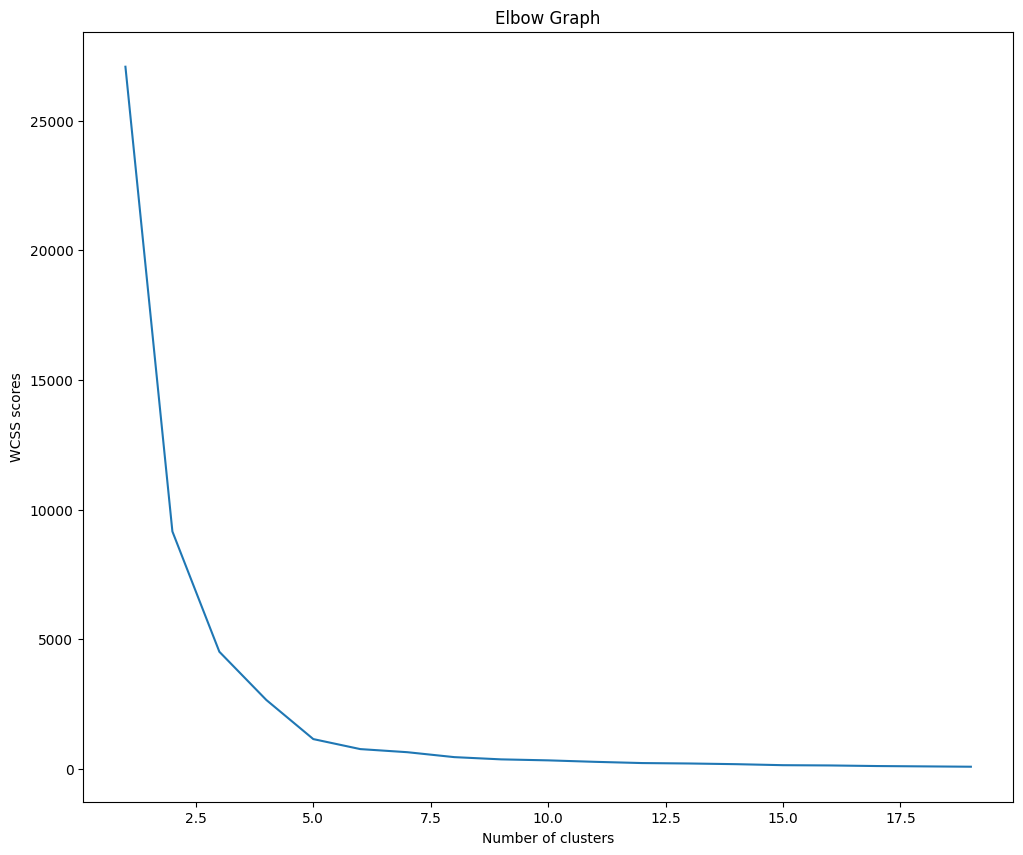

In [45]:
plt.figure(figsize=(12,10))
plt.plot(range(1,20), wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS scores")
plt.show()

In [46]:
# Taking 5 as optimal number of clusters
kmeans_optimal = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans_optimal.fit_predict(X)
y_kmeans 

array([2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3], dtype=int32)

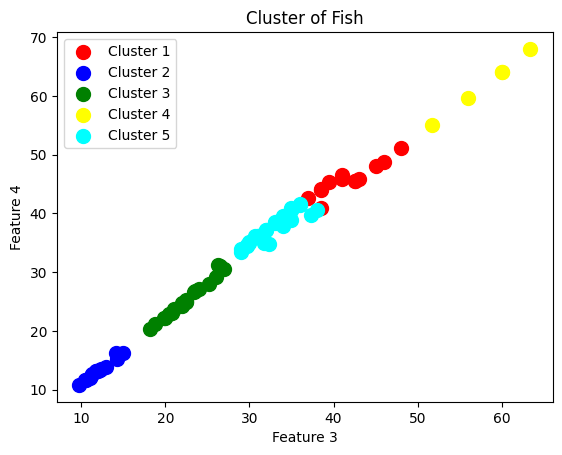

In [47]:
plt.scatter(X.iloc[y_kmeans==0,0], X.iloc[y_kmeans==0,1], s=100, c='red',label='Cluster 1')
plt.scatter(X.iloc[y_kmeans==1,0], X.iloc[y_kmeans==1,1], s=100, c='blue',label='Cluster 2')
plt.scatter(X.iloc[y_kmeans==2,0], X.iloc[y_kmeans==2,1], s=100, c='green',label='Cluster 3')
plt.scatter(X.iloc[y_kmeans==3,0], X.iloc[y_kmeans==3,1], s=100, c='yellow',label='Cluster 4')
plt.scatter(X.iloc[y_kmeans==4,0], X.iloc[y_kmeans==4,1], s=100, c='cyan',label='Cluster 5')
plt.title("Cluster of Fish")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.legend()

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score_avg = silhouette_score(X,y_kmeans)
silhouette_score_avg

0.619568956682236

## Hierarchical Clustering

The result is same as kmeans

1. Agglomerative: Initially all datapoints form individual clusters. Then two nearby points are chosen into a cluster. then this process is continued until everything becomes a single cluster.
2. Divisive: Initially a single cluster is formed. Then similar clusters are formed with this. until the satisfied amount of clusters are formed.


### How agglomerative clustering works.
1. Make eachpoint a cluster thus forming N clusters
2. take two data points and make it cluster thus forming N-1 clusters.
3. Make the points near to the cluster a single cluster
4. Make a single cluster.

   **Distance Calculation methods:**
   * Eucledian distance method: Commonly used. sqrt(X2-X1)^2 + (Y2-Y1)^2)
   * Manhattan Distance
   * Minkowski distance 
     **Distance between 2 clusters**
     * Distance between closest points(single linkage)
     * Distance between furthest points(complete linkage)
     * Average distance between all points(average linkage)
     * Distance between centroids(centroid linkage)

### How to get optimum number of clusters in hierarchical clutering?

We use **dendrograms** for this. in X- axis we will have data points, on Y- axis we will have eucledian distance. we will construct a box between two nearest points. the height of the box is the eucledian distance between the 2 points. This process is continued for points and clusters untill all the points become one cluster. The width of the box has no relevance.

We have to findout the line with the largest distance(height) which is not cut horizontally. if we draw a line horizontally over the longest line, how many times does it cuts; it is the optimal number of clusters.

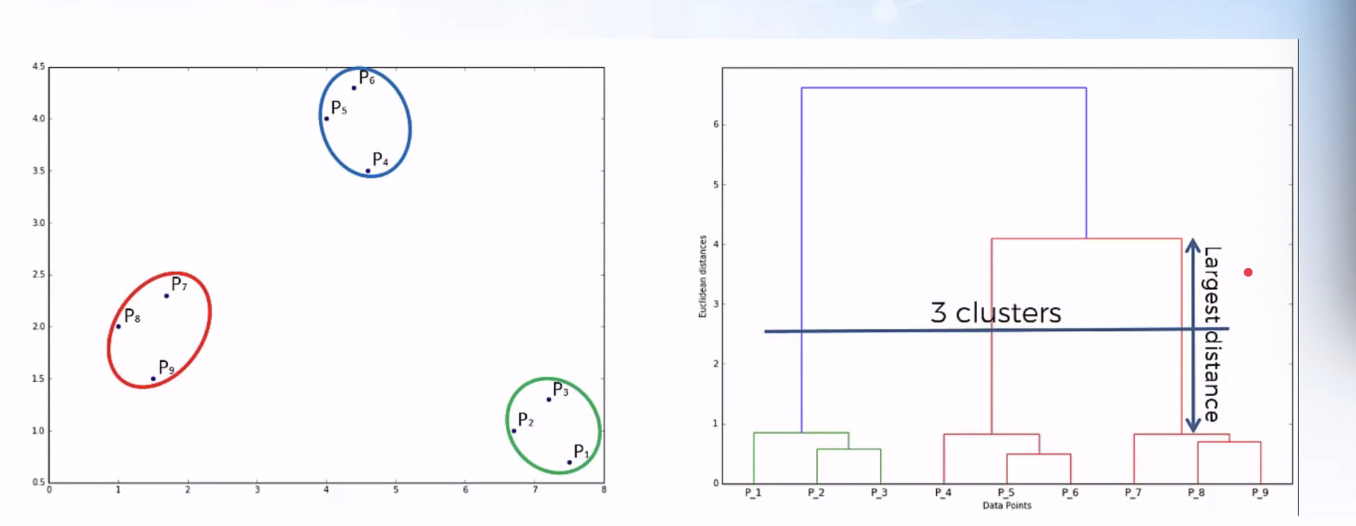



**Silhouette Score** used to find the accuracy of clustering. It defines the goodness of clustering. It's value ranges from -1 and 1. 1 means clusters are well apart. -1 means the clustering is completly wrong. It defines the cluster distance

**Silhoute score = (b-a)/max(a,b)**

a=average intra cluster distance. i.e, distance between each point in a cluster.
b=average inter cluster distance i.e, the average distance between all clusters.

In [33]:
mall_data =pd.read_csv("datasets/Mall_Customers.csv")
mall_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
X = mall_data.iloc[:,3:].values # we need only the values


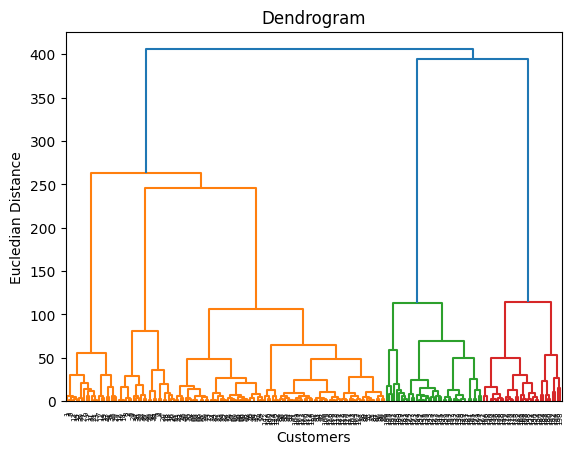

In [60]:
# We need find the optimal number of clusters using dendrogram method
import scipy.cluster.hierarchy as sch
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian Distance")
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"));

The optimal number of clusters is 5.

In [61]:
from sklearn.cluster import AgglomerativeClustering
hc_agg_cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y_hc = hc_agg_cluster.fit_predict(X)

In [62]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

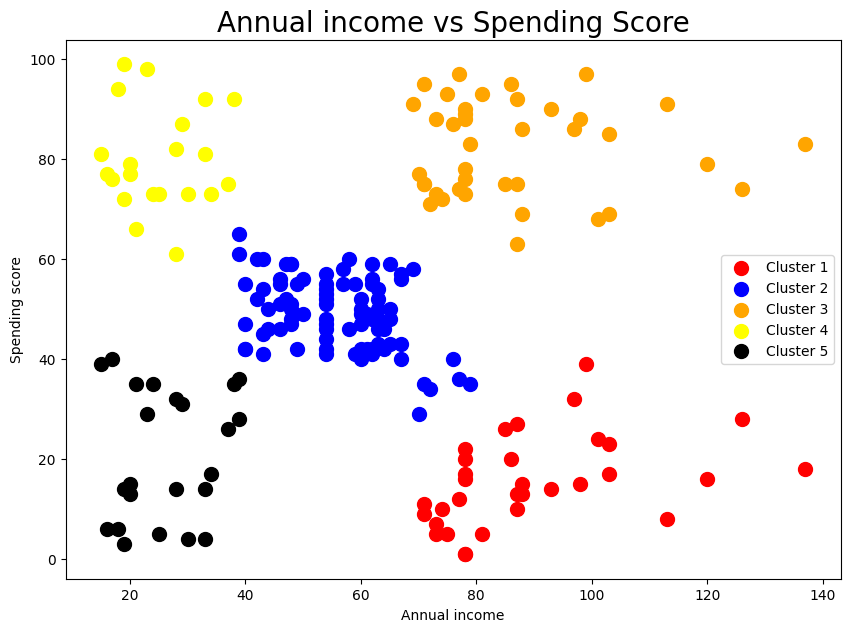

In [67]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, color="red", label="Cluster 1")
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, color="blue", label="Cluster 2")
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, color="orange", label="Cluster 3")
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=100, color="yellow", label="Cluster 4")
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s=100, color="black", label="Cluster 5")
plt.xlabel("Annual income")
plt.ylabel('Spending score')
plt.title("Annual income vs Spending Score", size=20)
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_hc)

0.5529945955148897

## PCA(Principal Component Analysis)

It is a dimentionality reduction technique. It makes computing easier and efficient. 

**Steps:**
1. Standardization
2. Covariance matrix calculation
3. Computing Eigen values and eigen vectors

 

In [71]:
#loading dataset from sklean 
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
canc_data = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
canc_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [72]:
canc_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [74]:
canc_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [75]:
# Standardizing the data using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(canc_data)
scaled_canc_df = pd.DataFrame(scaled_data, columns=canc_data.columns)
scaled_canc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [76]:
scaled_canc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [77]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_canc_df)


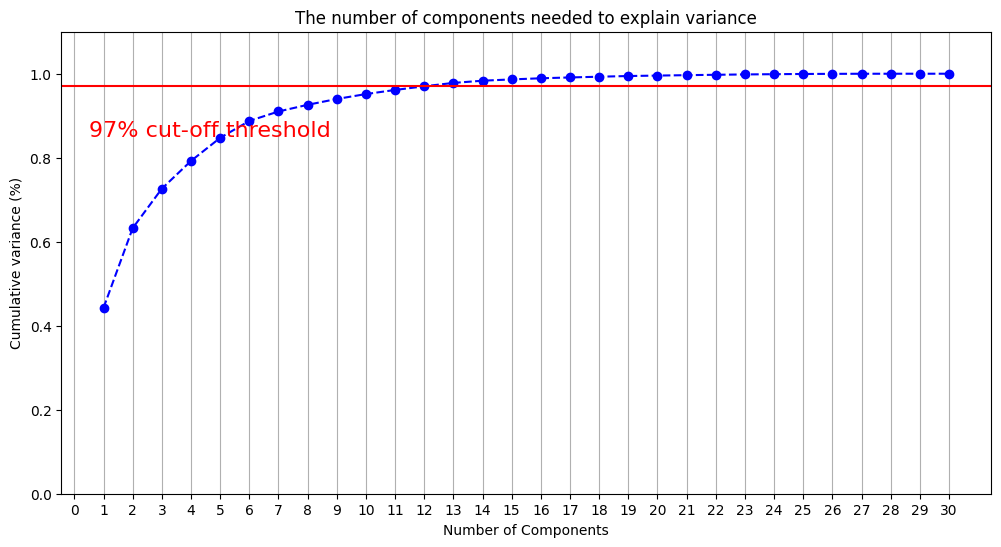

In [78]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [79]:
pca = PCA(n_components=10)
pca.fit(scaled_canc_df)
x_pca = pca.transform(scaled_canc_df)


In [81]:
x_pca.shape

(569, 10)

Choose the point which intersects with the horizontal line. Choose the x-point which is closest to the red line with minumum number of components.

**LDA(Linear Discriminat Analysis)** similar to PCA.